### 想分類成大領域讓大家不會是因為單一技能有連結
> e.g 吉他-音樂-鋼琴

#### 先畫出原本的個人連結圖

In [155]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,id,原文,標籤
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,藝術愛好者、運動愛好者、 探索未知領域
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動


In [156]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [157]:
keyword_to_ids

defaultdict(list,
            {'藝術愛好者': [1],
             '運動愛好者': [1],
             '探索未知領域': [1],
             '交流和建立連結': [2],
             '音樂': [2],
             '科技': [2, 10],
             '旅行': [2, 14],
             '創造力': [3],
             '挑戰傳統': [3],
             '藝術': [3],
             '創業': [3],
             '社會變革': [3],
             '冒險和探索': [4],
             '自然愛好者': [4],
             '社區建設': [4],
             '志願服務': [4],
             '學習和成長': [4],
             '音樂愛好者': [5],
             '彈奏吉他': [5],
             '創作音樂': [5],
             '動物愛護者': [5],
             '參與動物保護活動': [5],
             '廚藝愛好者': [6],
             '探索生活的各個方面': [6],
             '閱讀和了解不同文化背景的故事': [6],
             '分享笑容和快樂': [6],
             '尊重和包容每一個人': [6],
             '挑戰自我的精神': [7],
             '運動競技': [7],
             '數據分析和趨勢探索': [7],
             '成長和進步': [7],
             '持續學習和提升': [7],
             '幫助他人': [8],
             '社區服務和慈善活動': [8],
             '心理諮詢': [8],
             '關愛和支

In [163]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
P = nx.Graph()

# 加點
for id in id_to_keywords:
    P.add_node(id, type='id')
for keyword in keyword_to_ids:
    P.add_node(keyword, type='keyword')

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        P.add_edge(id, keyword)

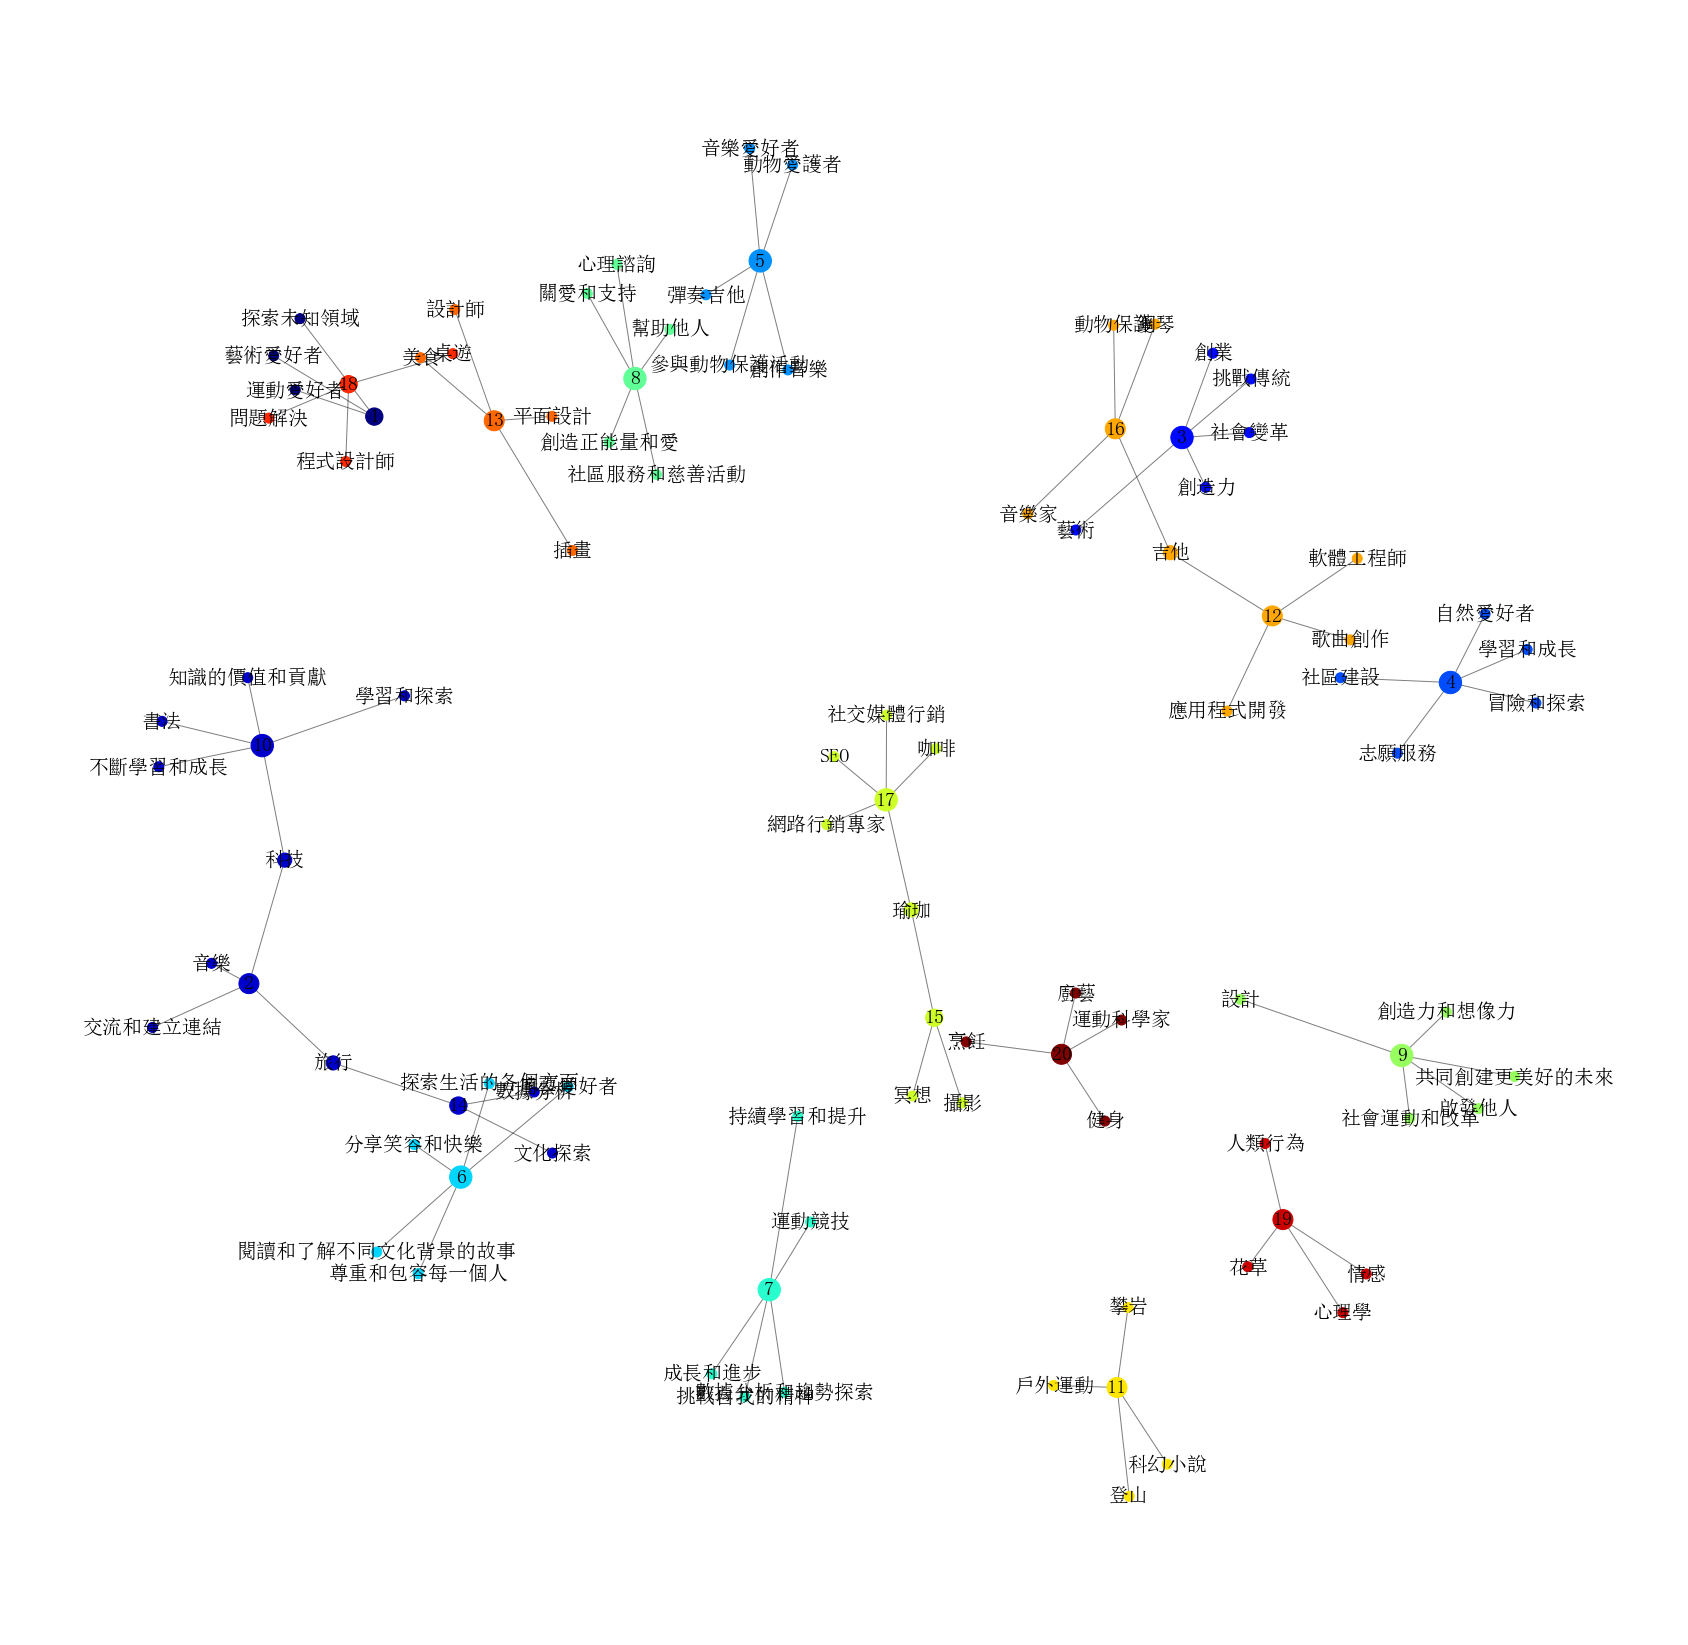

In [164]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(P)

community_colors = {node: partition[node] for node in P.nodes()}
values = [community_colors[node] for node in P.nodes()]

node_sizes = [100 * P.degree(node) for node in P.nodes()]

pos = nx.spring_layout(P, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(P, pos, alpha=0.5)
nx.draw_networkx_nodes(P, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(P, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()

#### 畫個對照表的圖

In [158]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
dic_df = pd.read_csv('index2.csv')

# Display the first few rows of the dataframe to understand its structure
dic_df.head()

,index,key
0,音樂,彈奏吉他
1,音樂,創作音樂
2,音樂,音樂愛好者
3,音樂,吉他
4,音樂,鋼琴


In [159]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
dic_df['key'] = dic_df['key'].str.replace('、', ',')

In [160]:
# 創建關鍵字與index之間的映射對照表
key_to_index = defaultdict(list)

for index, row in dic_df.iterrows():
    key = row['key']
    index_val = row['index']
    key_to_index[key].append(index_val)

In [161]:
key_to_index

defaultdict(list,
            {'彈奏吉他': ['音樂'],
             '創作音樂': ['音樂'],
             '音樂愛好者': ['音樂'],
             '吉他': ['音樂'],
             '鋼琴': ['音樂'],
             '音樂家': ['音樂'],
             '運動愛好者': ['運動'],
             '冒險和探索': ['運動'],
             '登山': ['運動'],
             '攀岩': ['運動'],
             '健身': ['運動', '運動'],
             '瑜珈': ['運動'],
             '咖啡': ['運動'],
             '運動科學家': ['運動'],
             '閱讀和了解不同文化背景的故事': ['文學'],
             '科幻小說': ['文學'],
             '科技': ['資訊'],
             '軟體工程師': ['資訊'],
             '應用程式開發': ['資訊'],
             '程式設計師': ['資訊'],
             '問題解決': ['資訊'],
             '數據分析': ['資訊'],
             'SEO': ['資訊'],
             '網路行銷專家': ['資訊'],
             '社交媒體行銷': ['資訊'],
             '交流和建立連結': ['軟技能'],
             '挑戰傳統': ['軟技能'],
             '創業': ['軟技能'],
             '社會變革': ['軟技能'],
             '分享笑容和快樂': ['軟技能'],
             '尊重和包容每一個人': ['軟技能'],
             '心理諮詢': ['軟技能'],
             '關愛和支持': ['軟技能'

In [165]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for index in key_to_index:
    G.add_node(index, type='index')
for key in key_to_index:
    G.add_node(key, type='keyword')

# 加邊
for key, index in key_to_index.items():
    for index in index:
        G.add_edge(index, key)

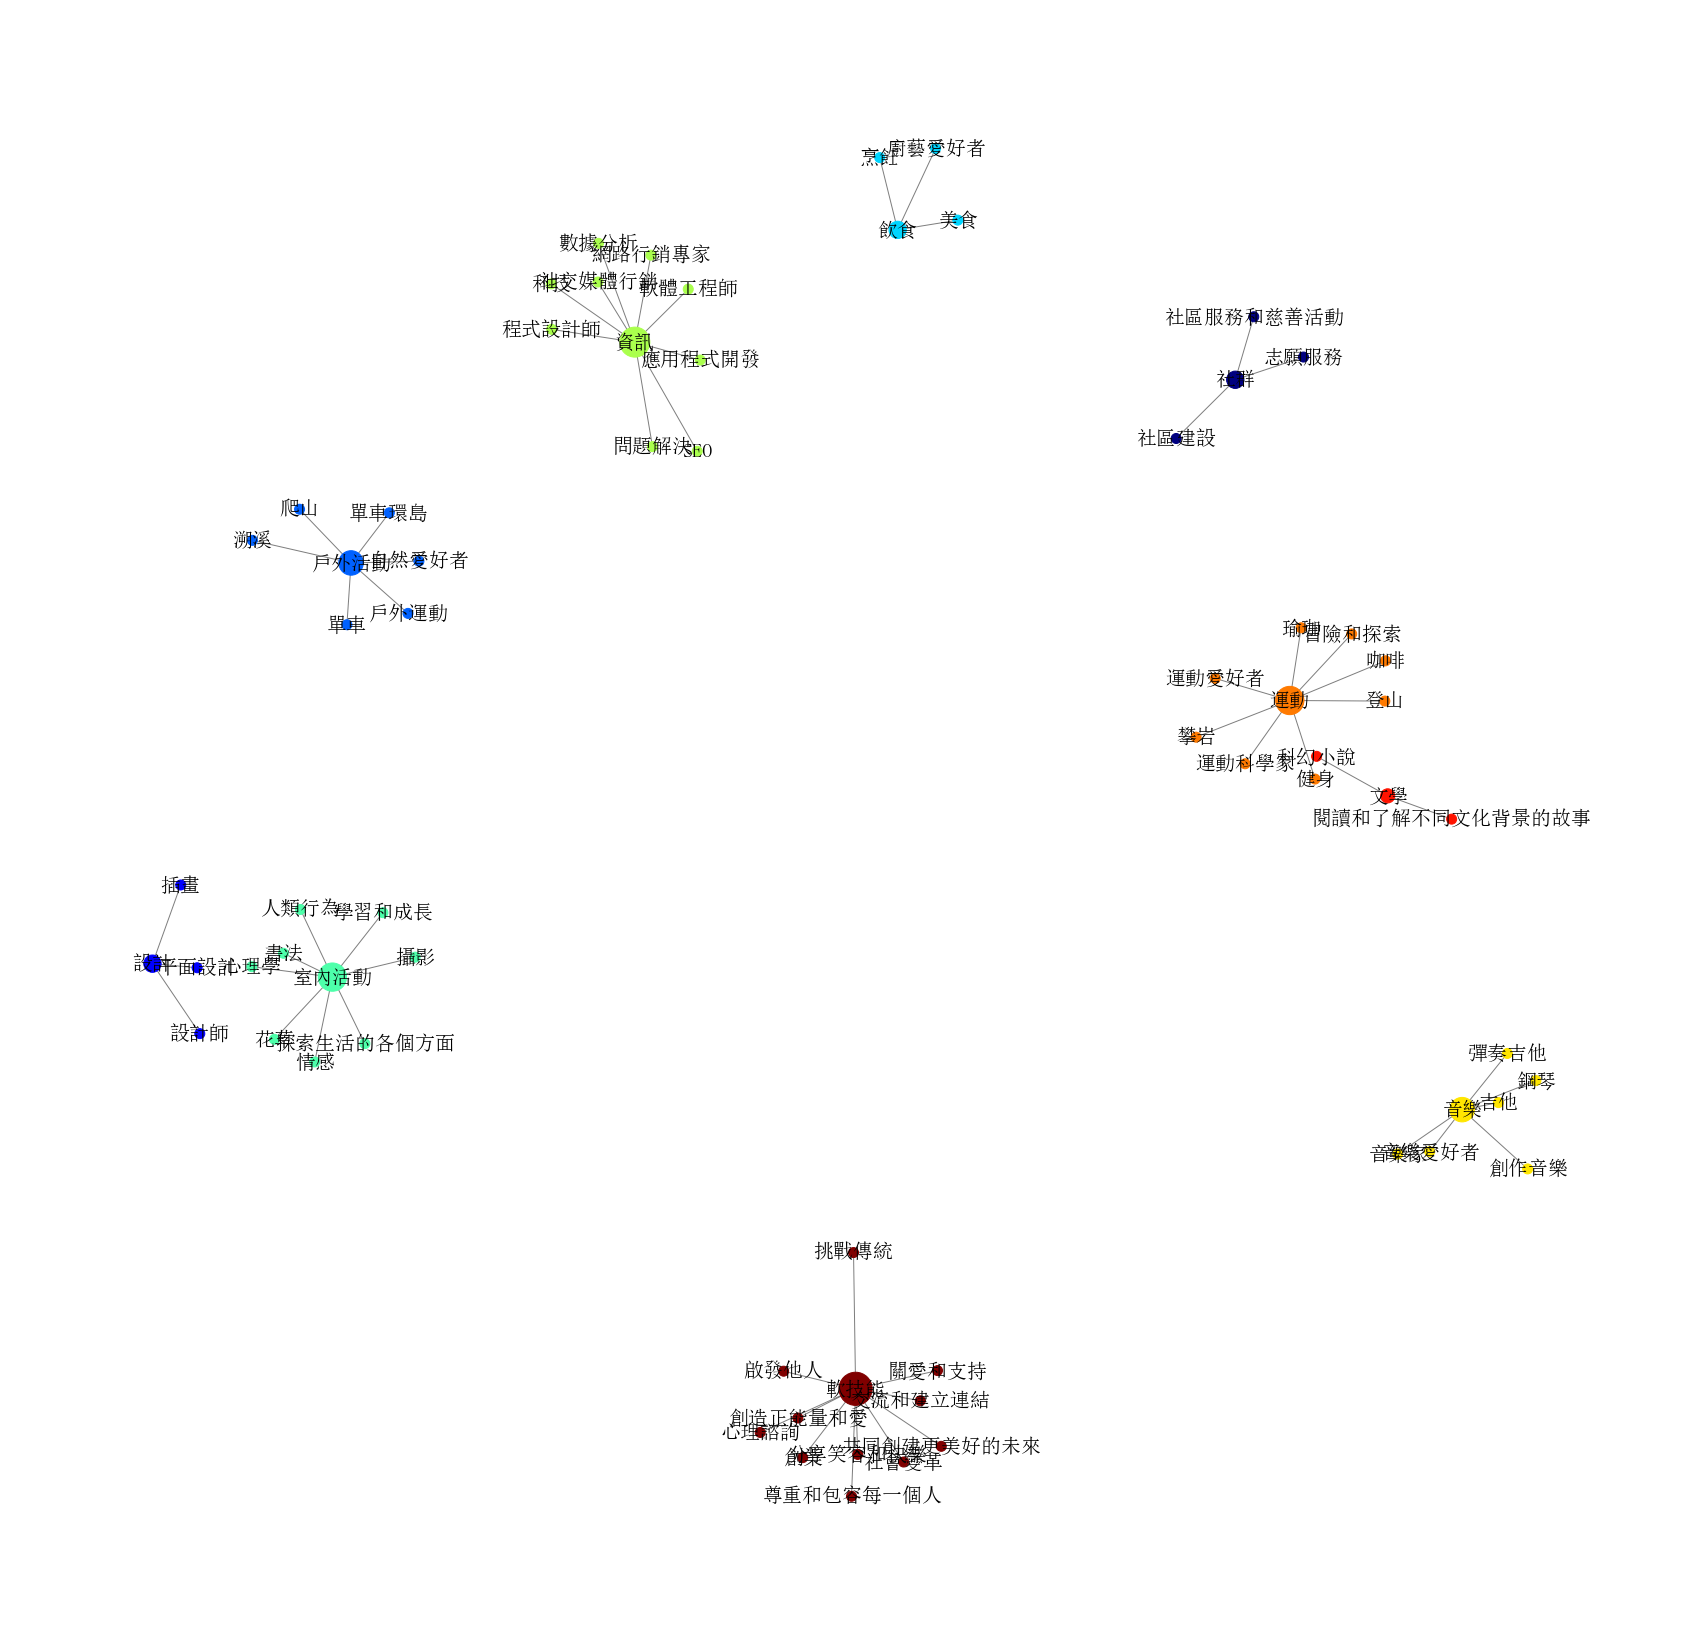

In [166]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()

#### Try to 合在一起

In [178]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
T = nx.Graph()

# 加點
for id in id_to_keywords:
    T.add_node(id, type='id')
for key in key_to_index:
    T.add_node(keyword, type='keyword')
for index in key_to_index:
    T.add_node(index, type="index")

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        T.add_edge(id, keyword)
        
for key, index in key_to_index.items():
    for id in ids:
        T.add_edge(id, keyword)

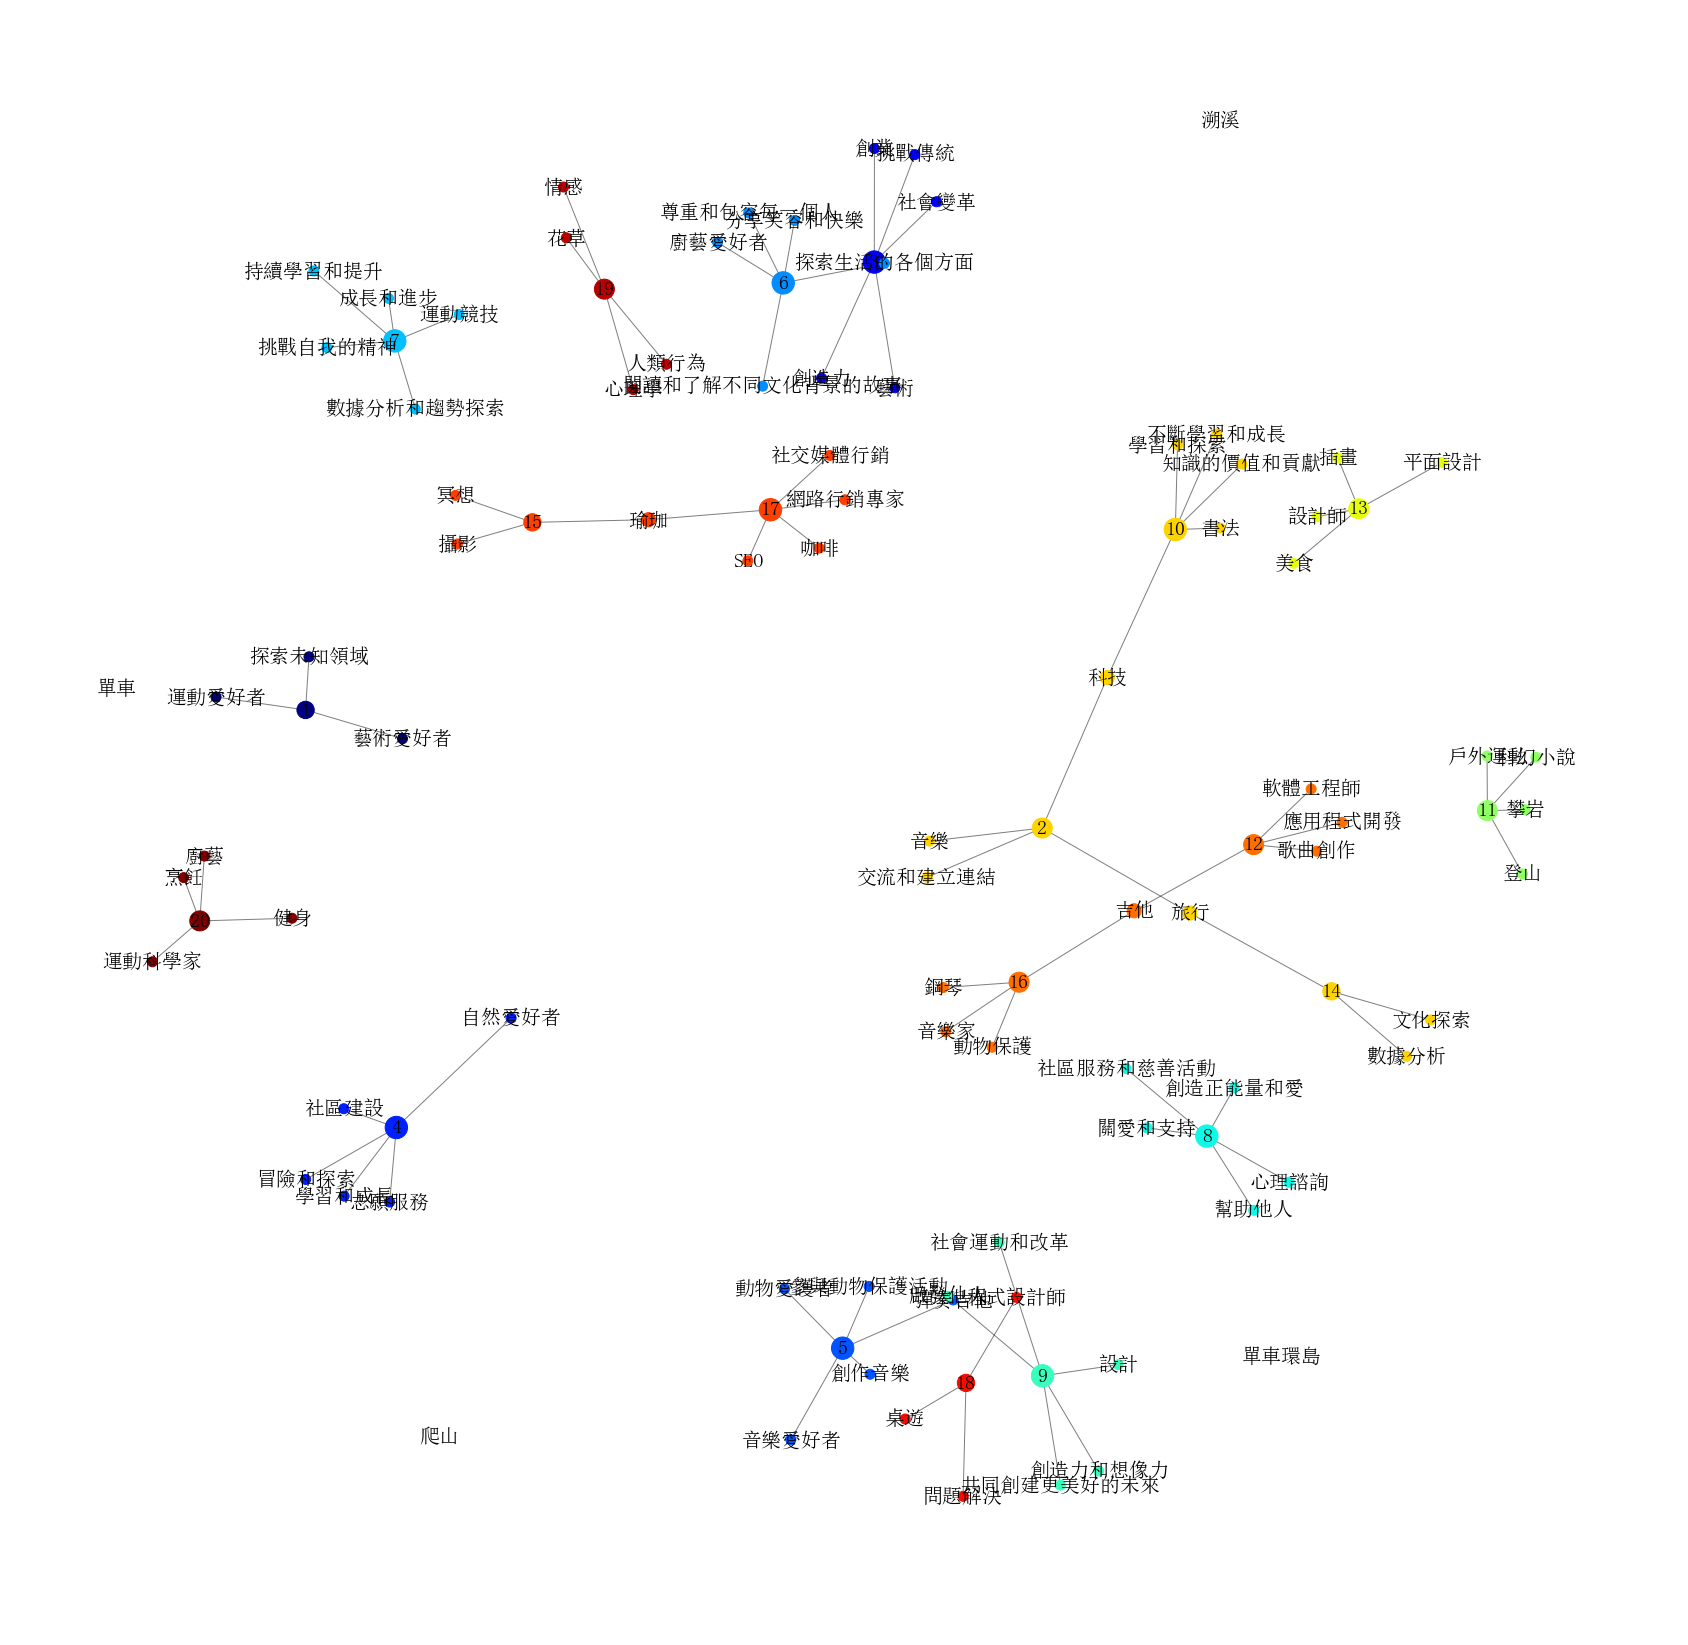

In [179]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(T)

community_colors = {node: partition[node] for node in T.nodes()}
values = [community_colors[node] for node in T.nodes()]

node_sizes = [100 * T.degree(node) for node in T.nodes()]

pos = nx.spring_layout(T, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(T, pos, alpha=0.5)
nx.draw_networkx_nodes(T, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(T, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()

### Example of Pecu

In [89]:
import pandas as pd
from collections import defaultdict 

# Load the CSV file to check its content
df = pd.read_csv('persona.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

,id,原文,標籤
0,1,大家好，我是一個充滿好奇心和熱情的人。我喜歡挑戰自己，探索未知領域。我是一位藝術愛好者，喜歡...,"藝術愛好者, 運動愛好者, 探索未知領域"
1,2,嗨，大家好！我是一個熱愛交流和建立連結的人。我喜歡與不同背景和文化的人交流，從中學習新的觀點...,交流和建立連結、音樂、科技、旅行
2,3,大家好，我是一個富有創造力和決心的人。我喜歡挑戰傳統，尋找新的解決方案和機會。我是一個藝術家...,創造力、挑戰傳統、藝術、創業、社會變革
3,4,嗨，大家好！我是一個喜歡冒險和探索的人。我喜歡挑戰自己，突破舒適圈，勇於嘗試新的事物。我是一...,冒險和探索、自然愛好者、社區建設、志願服務、學習和成長
4,5,大家好，我是一個充滿熱情和正能量的人。我喜歡將我的能量和激情帶給身邊的人，讓他們感受到生活的...,音樂愛好者、彈奏吉他、創作音樂、動物愛護者、參與動物保護活動


In [90]:
# 處理標籤欄位，確保每個關鍵字都被正確的分割為獨立的節點
df['標籤'] = df['標籤'].str.replace('、', ',').str.split(',')

# 創建關鍵字與ID之間的映射對照表
keyword_to_ids = defaultdict(list)
id_to_keywords = defaultdict(list)

for index, row in df.iterrows():
    id = row['id']
    id_to_keywords[id].append
    keywords = [keyword.strip() for keyword in row['標籤']]
    for keyword in keywords:
        keyword_to_ids[keyword].append(id)

In [91]:
keyword_to_ids

defaultdict(list,
            {'藝術愛好者': [1],
             '運動愛好者': [1],
             '探索未知領域': [1],
             '交流和建立連結': [2],
             '音樂': [2],
             '科技': [2, 10],
             '旅行': [2, 14],
             '創造力': [3],
             '挑戰傳統': [3],
             '藝術': [3],
             '創業': [3],
             '社會變革': [3],
             '冒險和探索': [4],
             '自然愛好者': [4],
             '社區建設': [4],
             '志願服務': [4],
             '學習和成長': [4],
             '音樂愛好者': [5],
             '彈奏吉他': [5],
             '創作音樂': [5],
             '動物愛護者': [5],
             '參與動物保護活動': [5],
             '廚藝愛好者': [6],
             '探索生活的各個方面': [6],
             '閱讀和了解不同文化背景的故事': [6],
             '分享笑容和快樂': [6],
             '尊重和包容每一個人': [6],
             '挑戰自我的精神': [7],
             '運動競技': [7],
             '數據分析和趨勢探索': [7],
             '成長和進步': [7],
             '持續學習和提升': [7],
             '幫助他人': [8],
             '社區服務和慈善活動': [8],
             '心理諮詢': [8],
             '關愛和支

In [92]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用 networkx
G = nx.Graph()

# 加點
for id in id_to_keywords:
    G.add_node(id, type='id')
for keyword in keyword_to_ids:
    G.add_node(keyword, type='keyword')

# 加邊
for keyword, ids in keyword_to_ids.items():
    for id in ids:
        G.add_edge(id, keyword)

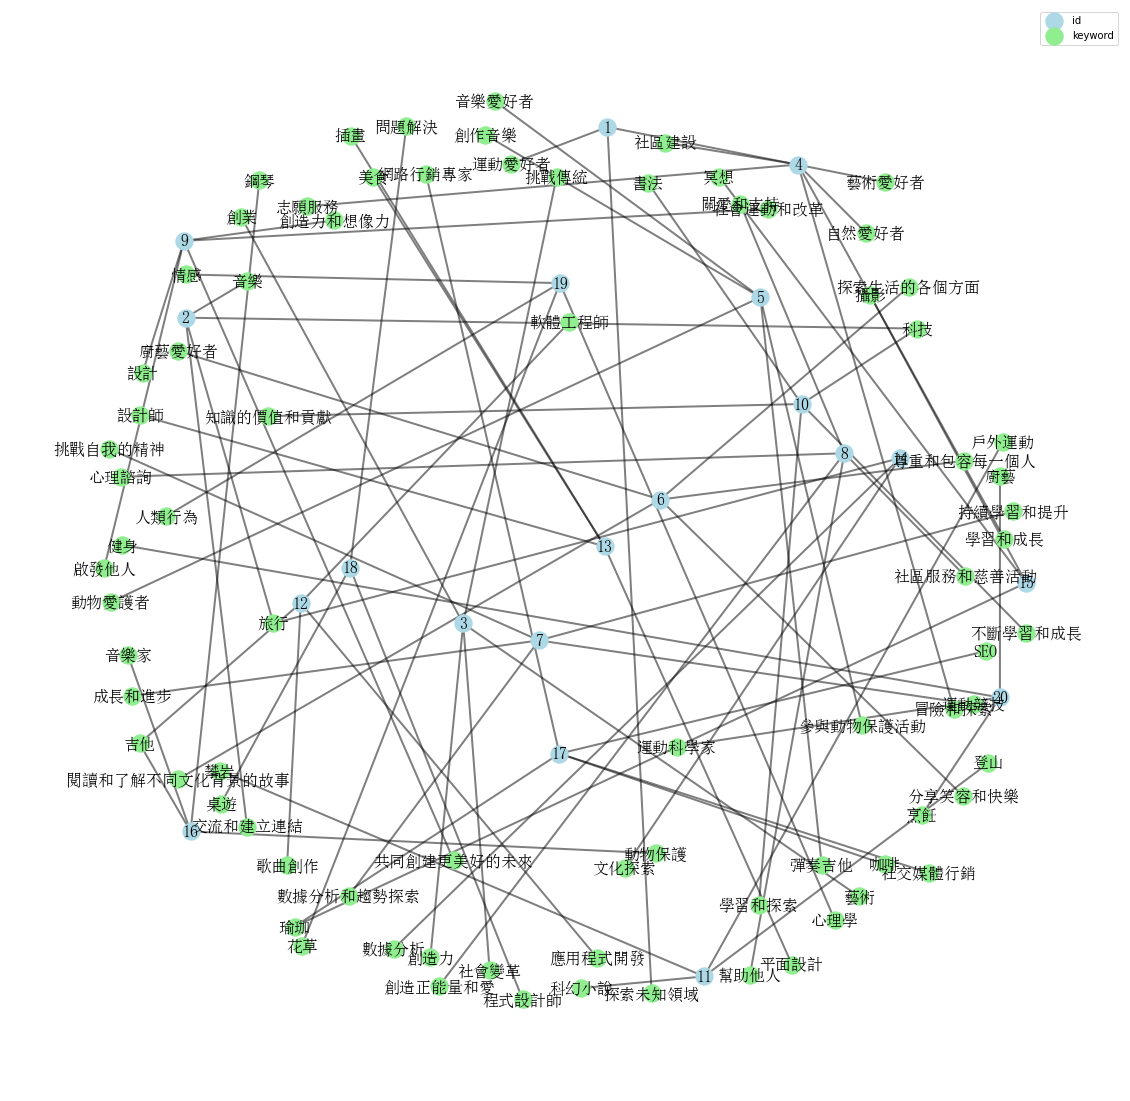

In [93]:
# 畫圖
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=1, iterations=40)
nx.draw_networkx_nodes(G, pos, nodelist=id_to_keywords.keys(), node_color='lightblue', label='id')
nx.draw_networkx_nodes(G, pos, nodelist=keyword_to_ids.keys(), node_color='lightgreen', label='keyword')
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=16, font_family='SimSun')

plt.axis('off')
plt.legend(scatterpoints=1)
plt.show()

!pip install -U python-louvain

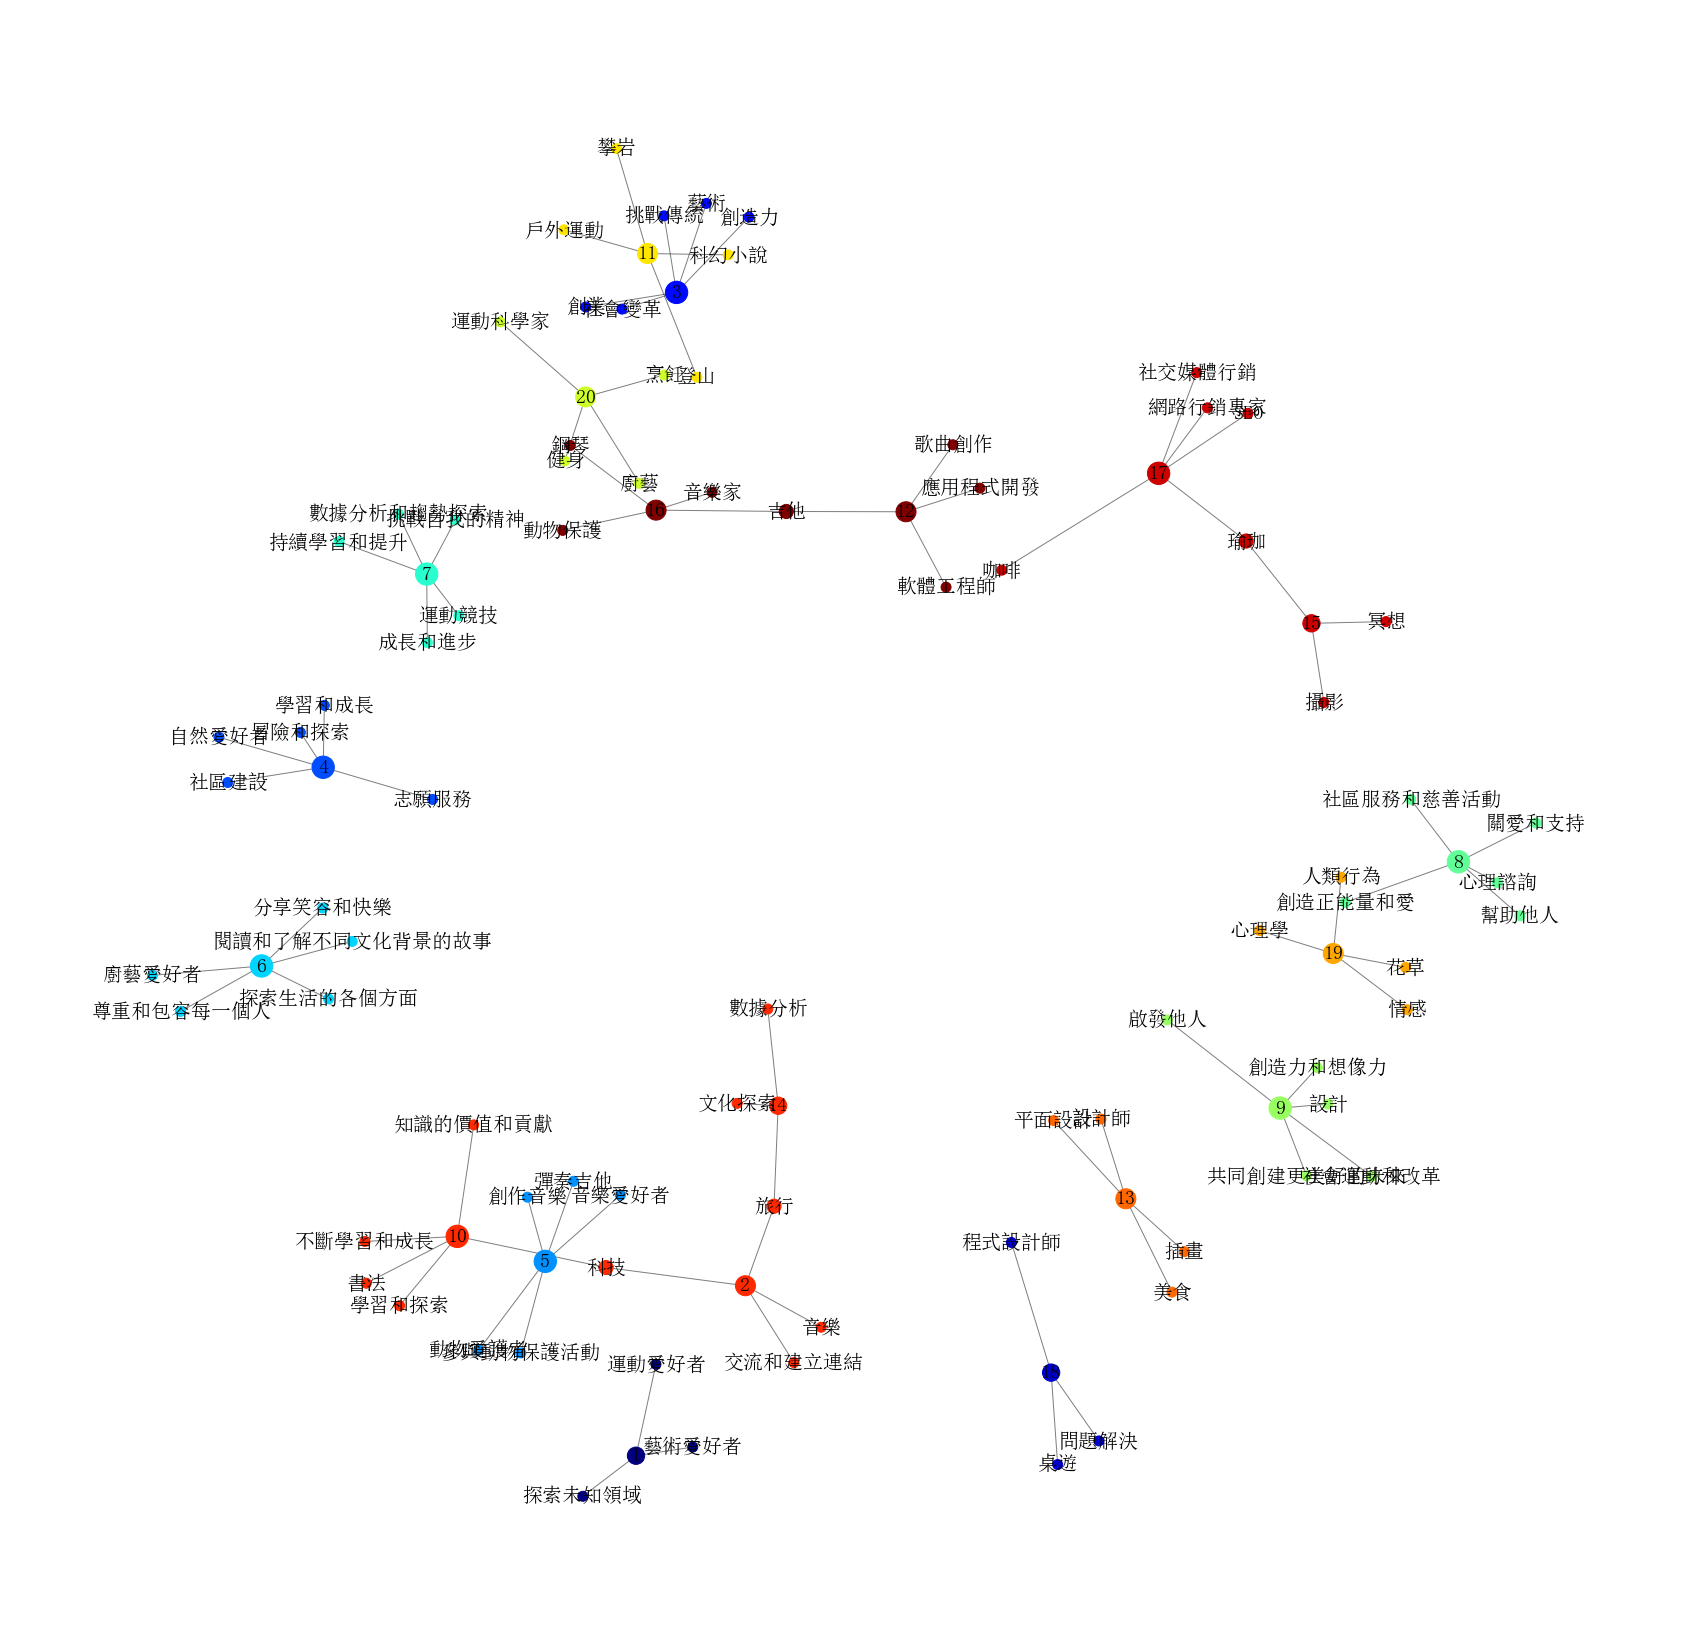

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

partition = community_louvain.best_partition(G)

community_colors = {node: partition[node] for node in G.nodes()}
values = [community_colors[node] for node in G.nodes()]

node_sizes = [100 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.15, iterations=40) 

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=values, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='SimSun')

plt.axis('off')
plt.show()